## Preprocessing

In [1]:
from nilearn import plotting
%matplotlib inline
import os
import json
from nipype.interfaces import fsl 
from nipype.interfaces import spm
from nipype.interfaces.spm import (Realign, SliceTiming, Coregister,  NewSegment,  Normalize12, Smooth)
from nipype.interfaces.spm import Level1Design, EstimateModel, EstimateContrast
from nipype.algorithms.modelgen import SpecifySPMModel
from nipype.interfaces import matlab as mlab
from nipype.interfaces.io import SelectFiles, DataSink
import nipype.interfaces.utility as util 
from nipype.algorithms import rapidart as ra
from nipype.interfaces.utility import Function, IdentityInterface
import nipype.pipeline.engine as pe
import nipype.interfaces.io as nio
from nipype.interfaces.base import Bunch
from nipype import DataGrabber, Workflow, Node
from scipy.io.matlab import loadmat

In [2]:
# necessary to let nipype know about matlab path

In [3]:
spm.SPMCommand.set_mlab_paths(paths=os.path.abspath(os.path.join(os.environ['HOME'], 'Documents/MATLAB/spm12/')), matlab_cmd='/soft/matlab_hd/R2020b/bin/glnxa64/MATLAB -nodesktop -nosplash')

stty: 'standard input': Inappropriate ioctl for device


In [4]:
mlab.MatlabCommand.set_default_matlab_cmd("/soft/matlab_hd/R2020b/bin/glnxa64/MATLAB  -nodesktop -nosplash")
mlab.MatlabCommand.set_default_paths(os.path.abspath(os.path.join(os.environ['HOME'], 'Documents/MATLAB/spm12/')))

In [5]:
# spm.SPMCommand().version

In [6]:
fsl.FSLCommand.set_default_output_type('NIFTI')

In [7]:
base_dir = os.path.join(os.environ['HOME'], 'spmbasics/data/')

In [8]:
experiment_dir = os.path.join(base_dir, 'output')
data_dir = os.path.abspath(os.path.join(base_dir, 'face_rep'))
output_dir = 'datasink'
working_dir = 'workingdir'

# list of subject identifiers
subject_list = ['M03953']

# TR of functional images
TR = 2.


# Smoothing width used during preprocessing
fwhm = [8]

In [9]:
# add how to refer sots

In [10]:
mat0 = mat = loadmat(os.path.join(data_dir, "sots.mat"), mat_dtype=True, matlab_compatible=True, struct_as_record=True)

In [11]:
mat = loadmat(os.path.join(data_dir, "sots.mat"), mat_dtype=True, matlab_compatible=True, struct_as_record=True, simplify_cells=True)
#sot = mat['sot'][1]

#itemlag = mat['itemlag'][0]
#onsets=[sot[0], sot[1], sot[2], sot[3]],


In [39]:
print(mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Jun  4 11:58:02 2008', '__version__': '1.0', '__globals__': [], 'itemlag': array([array([], dtype=float64),
       array([ 3.,  3., 10., 10., 14.,  1., 23.,  3.,  3., 37., 10., 42., 61.,
              33., 27., 61., 28., 22., 39., 37., 62., 37., 20., 54., 34., 50.]),
       array([], dtype=float64),
       array([11., 14.,  2., 47., 36., 18., 37., 59., 11., 56., 33.,  4., 57.,
              18., 59., 55., 46., 61.,  4., 67.,  9., 63., 13., 19., 42.,  1.])],
      dtype=object), 'sot': array([array([  6.74996667,  15.74996667,  17.99996667,  26.99996667,
               29.24996667,  31.49996667,  35.99996667,  42.74996667,
               65.24996667,  67.49996667,  74.24996667,  92.24996667,
              112.49996667, 119.24996667, 123.74996667, 125.99996667,
              137.24996667, 141.74996667, 143.99996667, 146.24996667,
              155.24996667, 159.74996667, 161.99996667, 164.24996667,
              204.

In [40]:
print(sot)

[ 13.49996667  40.49996667  47.24996667  56.24996667  89.99996667
  94.49996667  96.74996667 134.99996667 148.49996667 184.49996667
 191.24996667 202.49996667 215.99996667 233.99996667 236.24996667
 242.99996667 245.24996667 256.49996667 260.99996667 281.24996667
 290.24996667 303.74996667 310.49996667 319.49996667 339.74996667
 341.99996667]


In [29]:
print(len(onsets))

1


In [17]:
print(sot[2][0])

[1.33333334]


In [30]:
c = sot[1]

In [20]:
import numpy as np

In [31]:
np.shape(c)

(26, 1)

In [32]:
print(c.ndim)

2


In [41]:
onsets=[ mat['sot'][0], mat['sot'][1],  mat['sot'][2],  mat['sot'][3]]

In [42]:
print(onsets)

[array([  6.74996667,  15.74996667,  17.99996667,  26.99996667,
        29.24996667,  31.49996667,  35.99996667,  42.74996667,
        65.24996667,  67.49996667,  74.24996667,  92.24996667,
       112.49996667, 119.24996667, 123.74996667, 125.99996667,
       137.24996667, 141.74996667, 143.99996667, 146.24996667,
       155.24996667, 159.74996667, 161.99996667, 164.24996667,
       204.74996667, 238.49996667]), array([ 13.49996667,  40.49996667,  47.24996667,  56.24996667,
        89.99996667,  94.49996667,  96.74996667, 134.99996667,
       148.49996667, 184.49996667, 191.24996667, 202.49996667,
       215.99996667, 233.99996667, 236.24996667, 242.99996667,
       245.24996667, 256.49996667, 260.99996667, 281.24996667,
       290.24996667, 303.74996667, 310.49996667, 319.49996667,
       339.74996667, 341.99996667]), array([-3.33333333e-05,  2.24996667e+00,  8.99996667e+00,  1.12499667e+01,
        2.24999667e+01,  4.49999667e+01,  5.17499667e+01,  6.07499667e+01,
        6.29999667e

In [14]:
subjectinfo = [
    Bunch(
        conditions=['N1', 'N2', 'F1', 'F2'],
        onsets=[ mat['sot'][0], mat['sot'][1],  mat['sot'][2],  mat['sot'][3]],
        durations=[[0], [0], [0], [0]],
        amplitudes=None,
        tmod=None,
        pmod=None,
        regressor_names=None,
        regressors=None)
]

In [15]:
# design matrix setting

In [16]:
cond1 = ('positive effect of condition', 'T',
         ['N1', 'N2', 'F1', 'F2'], [1, 1, 1, 1])
cond2 = ('positive effect of condition_dtemo', 'T',
          ['N1', 'N2', 'F1', 'F2'], [1, 1, 1, 1])
cond3 = ('positive effect of condition_ddisp', 'T',
          ['N1', 'N2', 'F1', 'F2'], [1, 1, 1, 1])
# non-famous > famous
fam1 = ('positive effect of Fame', 'T',
        ['N1', 'N2', 'F1', 'F2'], [1, 1, -1, -1])
fam2 = ('positive effect of Fame_dtemp', 'T',
        ['N1', 'N2', 'F1', 'F2'], [1, 1, -1, -1])
fam3 = ('positive effect of Fame_ddisp', 'T',
        ['N1', 'N2', 'F1', 'F2'], [1, 1, -1, -1])
# rep1 > rep2
rep1 = ('positive effect of Rep', 'T',
        ['N1', 'N2', 'F1', 'F2'], [1, -1, 1, -1])
rep2 = ('positive effect of Rep_dtemp', 'T',
        ['N1', 'N2', 'F1', 'F2'], [1, -1, 1, -1])
rep3 = ('positive effect of Rep_ddisp', 'T',
        ['N1', 'N2', 'F1', 'F2'], [1, -1, 1, -1])
int1 = ('positive interaction of Fame x Rep', 'T',
        ['N1', 'N2', 'F1', 'F2'], [-1, -1, -1, 1])
int2 = ('positive interaction of Fame x Rep_dtemp', 'T',
        ['N1', 'N2', 'F1', 'F2'], [1, -1, -1, 1])
int3 = ('positive interaction of Fame x Rep_ddisp', 'T',
        ['N1', 'N2', 'F1', 'F2'], [1, -1, -1, 1])

contf1 = ['average effect condition', 'F', [cond1, cond2, cond3]]
contf2 = ['main effect Fam', 'F', [fam1, fam2, fam3]]
contf3 = ['main effect Rep', 'F', [rep1, rep2, rep3]]
contf4 = ['interaction: Fam x Rep', 'F', [int1, int2, int3]]
contrast_list = [
    cond1, cond2, cond3, fam1, fam2, fam3, rep1, rep2, rep3, int1, int2, int3,
    contf1, contf2, contf3, contf4
]

In [17]:
# SpecifyModel - Generates SPM-specific Model
modelspec = Node(SpecifySPMModel(concatenate_runs=False,
                                 input_units='scans',
                                 output_units='scans',
                                 time_repetition=TR,
                                 high_pass_filter_cutoff=128,
                                 subject_info = subjectinfo),
                 name="modelspec")

# Level1Design - Generates an SPM design matrix same as the first level tutorial
level1design = Node(Level1Design(bases={'hrf': {'derivs': [0, 0]}},
                                 timing_units='scans',
                                 interscan_interval=TR,
                                 volterra_expansion_order=1, # no model interction
                                 flags={'mthresh': 0.8},
                                 global_intensity_normalization='none',
                                 microtime_onset=12,
                                 microtime_resolution=24,
                                 #factor_info = [dict(name = 'Fame', levels = 2),
                                                #dict(name = 'Rep', levels = 2)],
                                 model_serial_correlations='AR(1)'), #matlabbatch{1}.spm.stats.fmri_spec.cvi = 'AR(1)';
                    name="level1design")

# EstimateModel - estimate the parameters of the model
level1estimate = Node(EstimateModel(estimation_method={'Classical': 1}),
                      write_residuals=False, 
                      name="level1estimate")

# EstimateContrast - estimates contrasts
level1conest = Node(EstimateContrast(contrasts = contrast_list),
                    use_derivs=True, 
                    name="level1conest")

In [18]:
# Infosource - a function free node to iterate over the list of subject names
infosource = Node(IdentityInterface(fields=['subject_id',
                                            'contrasts'],
                                    contrasts=contrast_list),
                  name="infosource")
infosource.iterables = [('subject_id', subject_list)]


templates = {'func': os.path.join(output_dir, 'preproc', '_subject_id_{subject_id}',
                         's{subject_id}_0005_0006_merged.nii'),
             'mc_param': os.path.join(output_dir, 'preproc', '_subject_id_{subject_id}',
                         'rp_s{subject_id}_0005_0006_merged.txt'),
             'outliers': os.path.join(output_dir, 'preproc', '_subject_id_{subject_id}', 
                             'art.wars{subject_id}_0005_0006_merged_outliers.txt')}
selectfiles = Node(SelectFiles(templates,
                               base_directory=experiment_dir,
                               sort_filelist=True),
                   name="selectfiles")

# Datasink - creates output folder for important outputs
datasink = Node(DataSink(base_directory=experiment_dir,
                         container=output_dir),
                name="datasink")

In [19]:
# Initiation of the 1st-level analysis workflow
event_cat = Workflow(name='l1analysis')
event_cat.base_dir = os.path.join(experiment_dir, working_dir)

# Connect up the 1st-level analysis components
event_cat.connect([(infosource, selectfiles, [('subject_id', 'subject_id')]),
                    (infosource, level1conest, [('contrasts', 'contrasts')]),
                    (selectfiles, modelspec, [('func', 'functional_runs')]),
                    (selectfiles, modelspec, [('mc_param', 'realignment_parameters'),
                                              ('outliers', 'outlier_files')]),
                    (modelspec, level1design, [('session_info','session_info')]),
                    (level1design, level1estimate, [('spm_mat_file','spm_mat_file')]),
                    (level1estimate, level1conest, [('spm_mat_file','spm_mat_file'),
                                                    ('beta_images','beta_images'),
                                                   ('residual_image', 'residual_image')]),
                    (level1conest, datasink, [('spm_mat_file', '1stLevel.@spm_mat'),
                                              ('spmT_images', '1stLevel.@T'),
                                              ('con_images', '1stLevel.@con'),
                                              ('spmF_images', '1stLevel.@F'),
                                              ('ess_images', '1stLevel.@ess')]),
                    ])

In [20]:
event_cat.write_graph(graph2use='colored', format='png', dotfilename='colored_graph.dot', simple_form=True)

240522-16:32:19,237 nipype.workflow INFO:
	 Generated workflow graph: /home/matay/spmbasics/data/output/workingdir/l1analysis/colored_graph.png (graph2use=colored, simple_form=True).


'/home/matay/spmbasics/data/output/workingdir/l1analysis/colored_graph.png'

In [21]:
event_cat.write_graph(graph2use='flat', format='png', dotfilename='flat_graph.dot', simple_form=True)

240522-16:32:22,760 nipype.workflow INFO:
	 Generated workflow graph: /home/matay/spmbasics/data/output/workingdir/l1analysis/flat_graph.png (graph2use=flat, simple_form=True).


'/home/matay/spmbasics/data/output/workingdir/l1analysis/flat_graph.png'

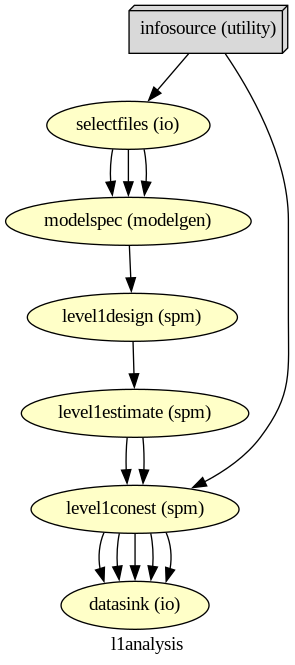

In [21]:
# Visualize the graph
from IPython.display import Image
Image(filename='/home/matay/spmbasics/data/output/workingdir/l1analysis/colored_graph.png')

In [22]:
event_cat.run()

240522-16:32:26,112 nipype.workflow INFO:
	 Workflow l1analysis settings: ['check', 'execution', 'logging', 'monitoring']
240522-16:32:26,119 nipype.workflow INFO:
	 Running serially.
240522-16:32:26,120 nipype.workflow INFO:
	 [Node] Setting-up "l1analysis.selectfiles" in "/home/matay/spmbasics/data/output/workingdir/l1analysis/_subject_id_M03953/selectfiles".
240522-16:32:26,121 nipype.workflow INFO:
	 [Node] Executing "selectfiles" <nipype.interfaces.io.SelectFiles>
240522-16:32:26,122 nipype.workflow INFO:
	 [Node] Finished "selectfiles", elapsed time 0.000267s.
240522-16:32:26,124 nipype.workflow INFO:
	 [Node] Setting-up "l1analysis.modelspec" in "/home/matay/spmbasics/data/output/workingdir/l1analysis/_subject_id_M03953/modelspec".
240522-16:32:26,127 nipype.workflow INFO:
	 [Node] Cached "l1analysis.modelspec" - collecting precomputed outputs
240522-16:32:26,127 nipype.workflow INFO:
	 [Node] "l1analysis.modelspec" found cached.
240522-16:32:26,128 nipype.workflow INFO:
	 [Node

stty: 'standard input': Inappropriate ioctl for device


240522-16:32:45,30 nipype.workflow INFO:
	 [Node] Finished "level1conest", elapsed time 12.567019s.
240522-16:32:45,33 nipype.workflow INFO:
	 [Node] Setting-up "l1analysis.datasink" in "/home/matay/spmbasics/data/output/workingdir/l1analysis/_subject_id_M03953/datasink".
240522-16:32:45,36 nipype.workflow INFO:
	 [Node] Executing "datasink" <nipype.interfaces.io.DataSink>
240522-16:32:45,38 nipype.workflow INFO:
	 [Node] Finished "datasink", elapsed time 0.00163s.


stty: 'standard input': Inappropriate ioctl for device
